In [31]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io
import random
random.seed(150)
#Miscelaneos

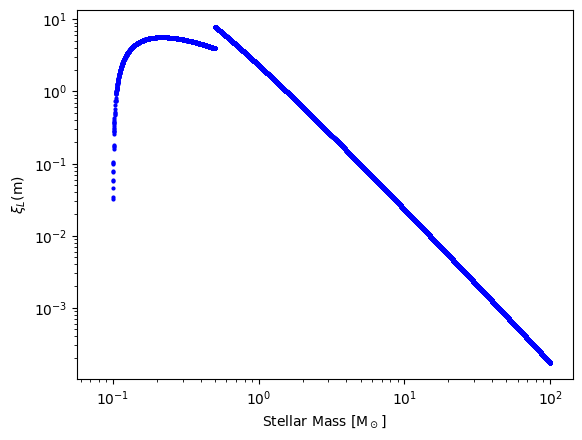

In [71]:
#Creamos masas aleatorias de 0.08 a 100 masas solares
n=  1000000
def masas(n):
    masa_estrella=[]
    exp=[]
    for _ in range(n):
        m=(random.uniform(0.08,100))
        masa_estrella.append(m)
        if 0.08<=m<0.5:
            exp.append(1.3)
        else:
            exp.append(2.3)
    return np.array(masa_estrella), np.array(exp)
masa_estrella, exp= masas(n)
y=(masa_estrella**(-exp))*np.log(10*masa_estrella)
plt.scatter(masa_estrella, y, s=4, c='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Stellar Mass [M$_\odot$]')
plt.ylabel(r'$\xi_L$(m)')
plt.show()

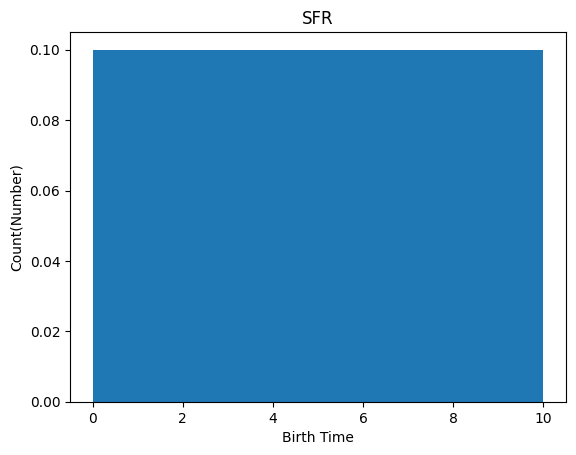

In [79]:
#creamos un SFR constante(poco realista pero para mas simplicidad)
def sfr(n):
    edad = np.linspace(0, 10, n)
    random.shuffle(edad)
    return edad
edad = sfr(n)
plt.hist(edad, bins=100,density=True)
plt.xlabel('Birth Time')
plt.ylabel('Count(Number)')
plt.title("SFR")
plt.show()

In [73]:
t_ini=10
#t_ms=t_ini/masas**(2.5)
#Usamos la funcion de tiempo de vida para cada masa (cedida por los profesores)
def ms(n):
    t_ms= t_ini/(masa_estrella**2.5)
    return t_ms

t_ms= ms(n)

In [74]:
#Clasificamos segun main sequence o fuera de main sequence y que tipo, dados los papers con funciones de masa
def tipo(masa_estrella,edad,t_ms):
    resto=[]
    masa_f=[]
    count=0
    for i in t_ms:
        if i < edad[count]:
            resto.append(0)
            masa_f.append(masa_estrella[count])
        elif i>edad[count] and masa_estrella[count]<9:
            resto.append(1)
            masa_f.append((0.109*masa_estrella[count])+0.394)
        elif i>edad[count] and 9 <= masa_estrella[count] <18.5:
            resto.append(2)
            if 9<masa_estrella[count]<=13:
                masa_f.append(2.24 + 0.508 * (masa_estrella[count] - 14.75) + 0.125 * (masa_estrella[count] - 14.75)**2 + 0.0110 * (masa_estrella[count] - 14.75)**3)
            elif 13<masa_estrella[count]<15:
                masa_f.append(0.123+0.112*masa_estrella[count])
            elif 15<=masa_estrella[count]<17.8:
                masa_f.append(0.996+0.0384*masa_estrella[count])
            elif 17.8<masa_estrella[count]<18.5:
                masa_f.append(-0.020+0.10*masa_estrella[count])
        elif i>edad[count] and masa_estrella[count]>=18.5:
            resto.append(3)
            if 18.5 <= masa_estrella[count]<40:
                masa_f.append(0.9*(-2.049+0.4140*masa_estrella[count])+(1-0.9)*(15.52-0.3294*(masa_estrella[count]-25.97)-0.02121*(masa_estrella[count]-25.97)**2+0.003120*(masa_estrella[count]-25.97)**3))
            elif 40<=masa_estrella[count]<120:
                masa_f.append(5.697+7.8598*(10**8)*masa_estrella[count]**(-4.858))
        count+=1
    return np.asarray(resto),np.asarray(masa_f)
resto, masa_f=tipo(masa_estrella,edad,t_ms)


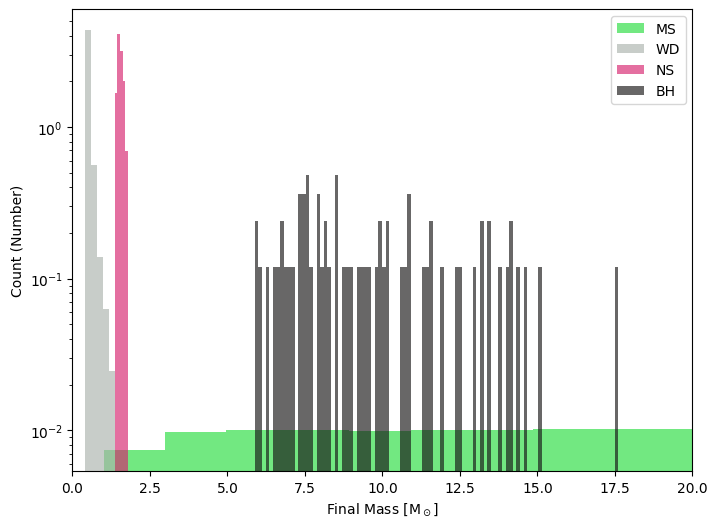

In [75]:
#Histograma de Masas Finales
types = ["MS", "WD", "NS", "BH"]

remnant_data = {t: [] for t in types}

for i, t in enumerate(types):
    mask = (resto == i)  
    remnant_data[t] = masa_f[mask]

hist_params = {
    "MS": {"bins": 50, "color": "#27DC3D"},
    "WD": {"bins": 5, "color": "#ABB2AC"},
    "NS": {"bins": 5, "color": "#D6226E"},
    "BH": {"bins": 100, "color": "#171516"},
}

plt.figure(figsize=(8, 6))

for t in types:
    plt.hist(remnant_data[t], **hist_params[t], label=t, density=True, alpha=0.65)

plt.xlabel('Final Mass [M$_\odot$]')
plt.ylabel('Count (Number)')
plt.yscale('log')
plt.xlim(0, 20)
plt.legend()

plt.show()


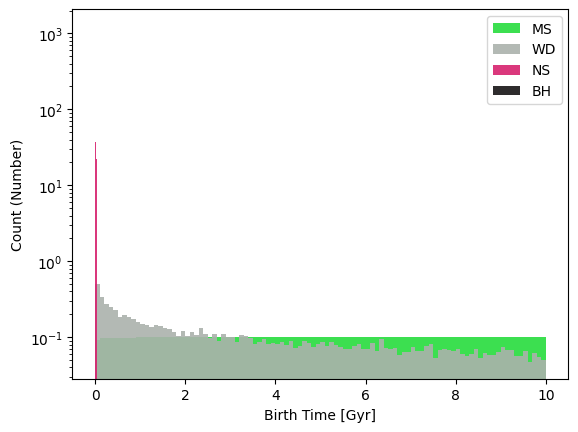

In [76]:
#Histograma Edades
for i, t in enumerate(types):
    mask = (resto == i) 
    remnant_data[t] = edad[mask]

hist_params = {
    "MS": {"bins": 100, "color": "#27DC3D"},
    "WD": {"bins": 100, "color": "#ABB2AC"},
    "NS": {"bins": 50, "color": "#D6226E"},
    "BH": {"bins": 50, "color": "#171516"},
}

fig, ax = plt.subplots()

for t in types:
    ax.hist(remnant_data[t], **hist_params[t], alpha=0.9, label=t, density=True)

ax.set_yscale('log')

plt.legend()

ax.set_xlabel('Birth Time [Gyr]')
ax.set_ylabel('Count (Number)')

plt.show()

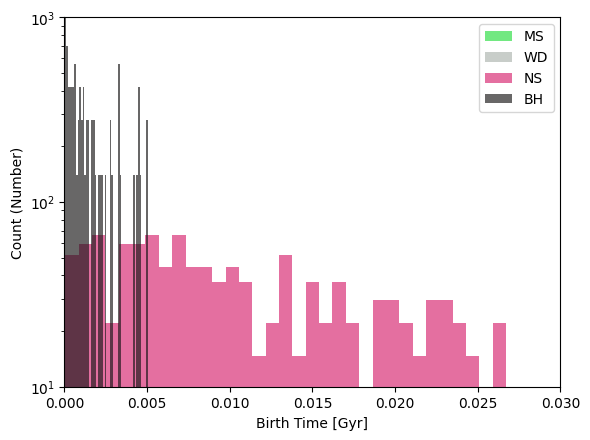

In [77]:
#Zoom histograma anterior
for i, t in enumerate(types):
    mask = (resto == i) 
    remnant_data[t] = edad[mask]

hist_params = {
    "MS": {"bins": 100, "color": "#27DC3D"},
    "WD": {"bins": 100, "color": "#ABB2AC"},
    "NS": {"bins": 50, "color": "#D6226E"},
    "BH": {"bins": 50, "color": "#171516"},
}

fig, ax = plt.subplots()

for t in types:
    ax.hist(remnant_data[t], **hist_params[t], alpha=0.65, label=t, density=True)

ax.set_yscale('log')

plt.legend()
ax.set_xlim(0, 0.03)
ax.set_ylim(1e1, 1e3)
ax.set_xlabel('Birth Time [Gyr]')
ax.set_ylabel('Count (Number)')

plt.show()

In [78]:
#Fracciones de remanentes
fMS=np.sum(resto==0)/n
fWD=np.sum(resto==1)/n
fNS=np.sum(resto==2)/n
fBH=np.sum(resto==3)/n
total=fMS+fBH+fWD+fNS
print('Fracción de Main Sequence Stars: ', fMS)
print('Fracción de White Dwarfs: ', fWD)
print('Fracción de Neutron Stars: ', fNS)
print('Fracción de Black Holes: ', fBH)
print('Suma de las fracciones', total)

Fracción de Main Sequence Stars:  0.984091
Fracción de White Dwarfs:  0.01567
Fracción de Neutron Stars:  0.000168
Fracción de Black Holes:  7.1e-05
Suma de las fracciones 1.0
